In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [4]:
# data normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # 1st convolutional layer
    MaxPooling2D((2, 2)),  # max pooling
    Conv2D(64, (3, 3), activation='relu'),  # 2nd convolutional layer
    MaxPooling2D((2, 2)),  # max pooling
    Flatten(),
    Dense(128, activation='relu'),  # fully conneted layer
    Dense(10, activation='softmax')  # output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Model compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Model training
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 80ms/step - accuracy: 0.3891 - loss: 1.6871 - val_accuracy: 0.5542 - val_loss: 1.2439
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.5917 - loss: 1.1610 - val_accuracy: 0.6202 - val_loss: 1.0837
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 77ms/step - accuracy: 0.6478 - loss: 0.9986 - val_accuracy: 0.6690 - val_loss: 0.9607
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.6888 - loss: 0.8936 - val_accuracy: 0.6737 - val_loss: 0.9367
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.7177 - loss: 0.8064 - val_accuracy: 0.6807 - val_loss: 0.9269
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.7424 - loss: 0.7462 - val_accuracy: 0.6932 - val_loss: 0.8929
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.7658 - loss: 0.6789 - val_accuracy: 0.6866 - val_loss: 0.9508
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.7814 - loss: 0.6273 - 

In [9]:
# Model accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 - 4s - 12ms/step - accuracy: 0.6992 - loss: 0.9450
Test Accuracy: 0.6992


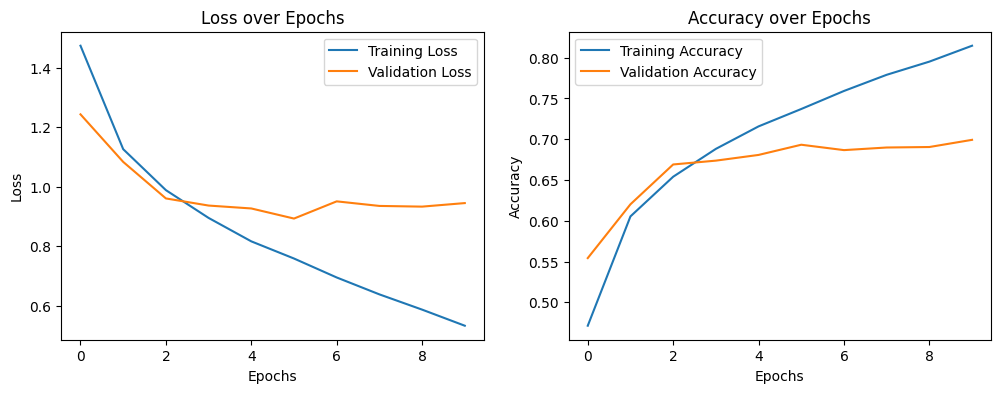

In [10]:
# graphs
plt.figure(figsize=(12, 4))

# Kloss praph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [18]:
# Model save
model.save("cifar10_cnn_model.h5")
print("Model saved successfully.")


Model saved successfully.


In [17]:
from tensorflow.keras.models import load_model

# load model
loaded_model = load_model("cifar10_cnn_model.h5")
print("Model loaded successfully.")


Model loaded successfully.


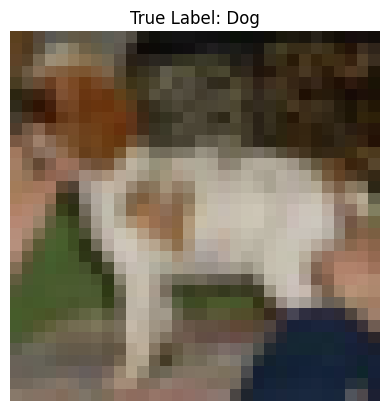

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Model ğrediction: Dog


In [19]:
import numpy as np
import matplotlib.pyplot as plt

#  choose picture from test set
index = 12
test_image = x_test[index]
true_label = class_names[y_test[index][0]]

# visualize chosen pic
plt.imshow(test_image)
plt.title(f"True Label: {true_label}")
plt.axis('off')
plt.show()


test_image_expanded = np.expand_dims(test_image, axis=0)  # (1, 32, 32, 3)

# predict
predicted_probs = loaded_model.predict(test_image_expanded)
predicted_label = class_names[np.argmax(predicted_probs)]

print(f"Model ğrediction: {predicted_label}")


In [14]:
from google.colab import files

# upload pic
uploaded = files.upload()

# check for files
for filename in uploaded.keys():
    print(f"uploaded pic: {filename}")


Saving Ekran görüntüsü 2025-01-22 154312.png to Ekran görüntüsü 2025-01-22 154312.png
Yüklenen dosya: Ekran görüntüsü 2025-01-22 154312.png


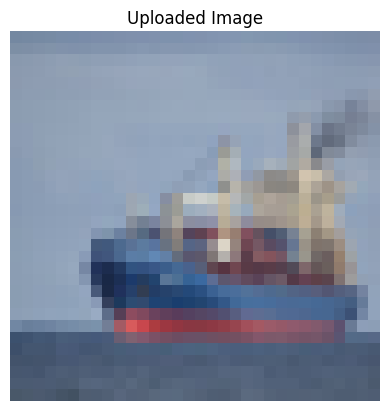

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


image_path = "uploadedimage.png"  # you can change it

# open pic and convert
test_image = Image.open(image_path).convert("RGB").resize((32, 32))

# visualize
plt.imshow(test_image)
plt.title("Uploaded Image")
plt.axis('off')
plt.show()


test_image_array = np.array(test_image) / 255.0  # Normalization
test_image_array = np.expand_dims(test_image_array, axis=0)  # (1, 32, 32, 3)


In [16]:
from tensorflow.keras.models import load_model


model = load_model("cifar10_cnn_model.h5")


predicted_probs = model.predict(test_image_array)
predicted_label = np.argmax(predicted_probs)


class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


print(f"Predicted Class: {class_names[predicted_label]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Class: Ship
